### k-means Clustering Algorithm with "wine" dataset

k-means is an unsupervised learning, clustering algorithm. it requires the number of clusters to be specified for the data to be divided into clusters. This algorithm works by iteratively grouping data based on the similarity of features. From the algorithm we get the centroids of the clusters and the labels for the data points i.e., the cluster to which the data point is assigned. <br>

Number of clusters is determined by plotting the mean distance to centroid of each group and the 'elbow point' where there is a shift can be taken as 'k' value. <br>

The 'wine' data are the results of a chemical analysis of wines grown in a region in Italy but derived from three different cultivars. There are 13 variables in the dataset and they are the constituents found in each of the three types of wines. <br>

The variables are:<br>
 	1) Alcohol <br>
 	2) Malic acid <br>
 	3) Ash<br>
	4) Alcalinity of ash  <br>
 	5) Magnesium<br>
	6) Total phenols<br>
 	7) Flavanoids<br>
 	8) Nonflavanoid phenols<br>
 	9) Proanthocyanins<br>
	10)Color intensity<br>
 	11)Hue<br>
 	12)OD280/OD315 of diluted wines<br>
 	13)Proline   <br>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wines = pd.read_csv("data/wine.csv")
wines.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
wines.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
wine = wines.drop('Wine', axis=1)

In [4]:
wine.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [5]:
wine.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## k-Means Clustering

### Elbow method to find the optimal number of clusters
As we can see in the below plot, the elbow is located at k = 3, which suggests that k = 3 is a good choice for this 'wine' dataset

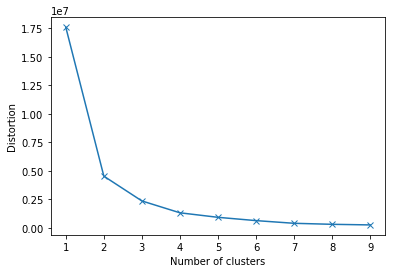

In [6]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm

distortions = []

for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(wine)
    distortions.append(km.inertia_)
    
plt.plot(range(1,10), distortions, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics

# K Means Cluster (n=3)
model3 = KMeans(n_clusters=3)
model3.fit(wine)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
model3.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1])

Running predict on the training set returns the same as labels_

In [9]:
y_pred = model3.predict(wine)
print(y_pred)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


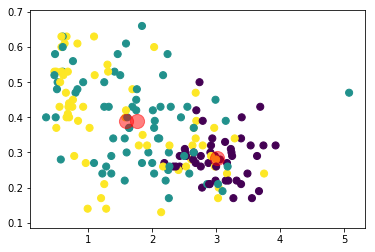

In [10]:
plt.scatter(wine.iloc[:, 6], wine.iloc[:, 7], c=y_pred, s=50, cmap='viridis')

centers = model3.cluster_centers_
plt.scatter(centers[:, 6], centers[:, 7], c='red', s=200, alpha=0.5)

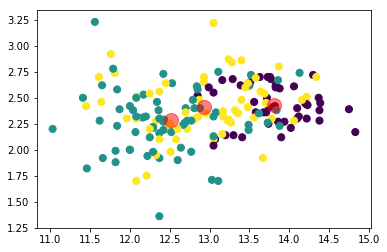

In [11]:
plt.scatter(wine.iloc[:, 0], wine.iloc[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=200, alpha=0.5)

We don't have clusters defined before hand in real world, but in this data we already know the clusters. So I compared the obtained clusters with the known classifications.

In [12]:
pd.crosstab(y_pred, wines.Wine)

Wine,1,2,3
row_0,,,
0,46,1,0
1,0,50,19
2,13,20,29


As the clusters obtained aren't homogenous, I applied standard scaling to get more accurate results.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

scaler = StandardScaler()
model3_scaler = KMeans(n_clusters=3)

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(scaler, model3_scaler)

pipe.fit(wine)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [14]:
y_pred_scaler = pipe.predict(wine)
print(y_pred_scaler)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [15]:
pd.crosstab(y_pred_scaler, wines.Wine)

Wine,1,2,3
row_0,,,
0,0,65,0
1,59,3,0
2,0,3,48


These are the resukts if only two clusters are taken.

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics

# K Means Cluster (n=2)
model2 = KMeans(n_clusters=2)
model2.fit(wine)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
y_pred2 = model2.predict(wine)
print(y_pred2)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [29]:
pd.crosstab(y_pred2, wines.Wine)

Wine,1,2,3
row_0,,,
0,9,67,47
1,50,4,1


In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics

# K Means Cluster (n=5)
model5 = KMeans(n_clusters=5)
model5.fit(wine)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
y_pred5 = model5.predict(wine)
print(y_pred5)

[0 0 0 2 4 2 2 2 0 0 2 2 2 0 2 2 2 0 2 4 4 4 0 0 4 4 0 2 4 0 2 2 0 2 0 4 4
 0 0 4 4 0 0 3 4 0 0 0 0 2 0 2 0 2 0 0 0 2 2 1 3 1 3 1 1 3 1 1 4 3 4 1 1 0
 4 1 1 1 4 1 1 3 3 1 1 1 1 3 3 3 1 1 1 1 1 4 3 1 3 1 3 3 1 1 3 1 1 1 1 3 3
 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 3 3 1 3 3 3 3 3 1 3 3 3 4 1 3 4 4 1 3
 3 3 1 1 1 3 3 3 1 4 3 3 1 3 3 3 3 1 3 3 4 3 1 1 3 4 4 4 4 3]


In [30]:
pd.crosstab(y_pred5, wines.Wine)

Wine,1,2,3
row_0,,,
0,26,1,0
1,0,45,12
2,20,0,0
3,1,20,27
4,12,5,9


### Performance Evaluation
Inertia measures clustering quality. It measures how spread out the clusters are (lower is better). k-means attempts to minimize the inertia when choosing clusters.

In [20]:
print(model3.inertia_)

2370689.68678


The adjusted Rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization. But, the true labels are not available to us in real-world cases. So, we have to use intertia to evaluate the clusters.

In [21]:
metrics.adjusted_rand_score(wines.Wine, y_pred)  

0.37111371823084754

In [22]:
model3.cluster_centers_

array([[  1.38044681e+01,   1.88340426e+00,   2.42617021e+00,
          1.70234043e+01,   1.05510638e+02,   2.86723404e+00,
          3.01425532e+00,   2.85319149e-01,   1.91042553e+00,
          5.70255319e+00,   1.07829787e+00,   3.11404255e+00,
          1.19514894e+03],
       [  1.25166667e+01,   2.49420290e+00,   2.28855072e+00,
          2.08231884e+01,   9.23478261e+01,   2.07072464e+00,
          1.75840580e+00,   3.90144928e-01,   1.45188406e+00,
          4.08695651e+00,   9.41159420e-01,   2.49072464e+00,
          4.58231884e+02],
       [  1.29298387e+01,   2.50403226e+00,   2.40806452e+00,
          1.98903226e+01,   1.03596774e+02,   2.11112903e+00,
          1.58403226e+00,   3.88387097e-01,   1.50338710e+00,
          5.65032258e+00,   8.83967742e-01,   2.36548387e+00,
          7.28338710e+02]])

In [23]:
print(model2.inertia_)

4543749.61453


In [24]:
metrics.adjusted_rand_score(wines.Wine, y_pred2)  

0.3694075388574537

In [25]:
print(model5.inertia_)

916379.187154


In [26]:
metrics.adjusted_rand_score(wines.Wine, y_pred5)  

0.31158801033176253

## Agglomerative Clustering
We set the n_cluster parameter to 3 and cluster the samples into three groups using complete linkage approach based on the Euclidean distance metric

In [27]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(wine)
print('Cluster labels: %s' % labels)

Cluster labels: [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 2 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 1 2 1 1 1 1 2 1 1 2 2 2 1 1 2
 2 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 1
 2 1 1 1 1 2 1 2 1 2 2 1 1 2 1 2 1 1 2 2 2 1 1 1 2 2 2 2 2 1]


In [28]:
pd.crosstab(labels, wines.Wine)

Wine,1,2,3
row_0,,,
0,43,0,0
1,0,56,27
2,16,15,21


### References

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html<br>
https://archive.ics.uci.edu/ml/datasets/wine<br>
http://www.shichaoji.com/2017/02/16/unsupervised-learning-1/<br>
https://www.datascience.com/blog/k-means-clustering